In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sa2_region = gpd.read_file("SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")
sa2_region.columns = sa2_region.columns.str.lower()

null_count_arr = []

for i in sa2_region.columns:
    null_count_arr.append(sa2_region[i].isnull().sum())

print("null count: ", null_count_arr)

# remove 19 rows with null values
sa2_region = sa2_region.dropna()

null_count_arr = []

for i in sa2_region.columns:
    null_count_arr.append(sa2_region[i].isnull().sum())

print("null count new: ", null_count_arr)

sa2_region = sa2_region.rename(columns={'sa2_code21': 'sa2_code'})

null count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 19]
null count new:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
birth = pd.read_csv("birth.csv")
#about data: https://data.aurin.org.au/dataset/au-govt-abs-abs-births-sa2-2010-2020-sa2-2016

#download link: https://adp.aurin.org.au/geoserver/wfs?request=GetFeature&typename=datasource-AU_Govt_ABS-UoM_AURIN_DB_3:abs_births_sa2_2010_2020

#download page link: https://adp-access.aurin.org.au/public/download/?uri=https://adp.aurin.org.au/geoserver/wfs?request=GetFeature&typename=datasource-AU_Govt_ABS-UoM_AURIN_DB_3:abs_births_sa2_2010_2020
null_count_arr = []

for i in birth.columns:
    null_count_arr.append(birth[i].isnull().sum())

print("null count: ", null_count_arr)

birth.drop('sa2_name', inplace=True, axis=1)
birth.drop('_2010_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2010_births_no', inplace=True, axis=1)
birth.drop('_2010_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2011_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2011_births_no', inplace=True, axis=1)
birth.drop('_2011_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2012_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2012_births_no', inplace=True, axis=1)
birth.drop('_2012_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2013_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2013_births_no', inplace=True, axis=1)
birth.drop('_2013_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2014_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2014_births_no', inplace=True, axis=1)
birth.drop('_2014_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2015_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2015_births_no', inplace=True, axis=1)
birth.drop('_2015_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2016_estimated_resident_population_persons', inplace=True, axis=1)
birth.drop('_2016_births_no', inplace=True, axis=1)
birth.drop('_2016_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2017_estimated_resident_populationa_persons', inplace=True, axis=1)
birth.drop('_2017_births_no', inplace=True, axis=1)
birth.drop('_2017_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2018_estimated_resident_populationa_persons', inplace=True, axis=1)
birth.drop('_2018_birthsa_no', inplace=True, axis=1)
birth.drop('_2018_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2019_estimated_resident_populationa_persons', inplace=True, axis=1)
birth.drop('_2019_births_no', inplace=True, axis=1)
birth.drop('_2019_total_fertility_rate_rate', inplace=True, axis=1)
birth.drop('_2020_estimated_resident_populationa_persons', inplace=True, axis=1)
birth.drop('_2020_total_fertility_rate_rate', inplace=True, axis=1)


birth.columns = birth.columns.str.lower()
birth


null count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,fid,fid,sa2_code,_2020_births_no,geom
0,abs_births_sa2_2010_2020.1,1,101021007,33,MULTIPOLYGON (((-35.44426999899997 149.5842329...
1,abs_births_sa2_2010_2020.2,2,101041023,34,MULTIPOLYGON (((-37.074006001999976 149.916344...
2,abs_births_sa2_2010_2020.3,3,101041024,25,MULTIPOLYGON (((-35.71031300499993 150.2819669...
3,abs_births_sa2_2010_2020.4,4,101041025,76,MULTIPOLYGON (((-36.89753899799996 149.9315900...
4,abs_births_sa2_2010_2020.5,5,101041026,63,MULTIPOLYGON (((-35.911898494999946 150.049854...
...,...,...,...,...,...
2283,abs_births_sa2_2010_2020.2284,2284,801101137,0,MULTIPOLYGON (((-35.308922999999936 149.037316...
2284,abs_births_sa2_2010_2020.2285,2285,801101138,0,MULTIPOLYGON (((-35.30160900699997 149.0529619...
2285,abs_births_sa2_2010_2020.2286,2286,801101139,51,MULTIPOLYGON (((-35.321953992999966 149.031217...
2286,abs_births_sa2_2010_2020.2287,2287,801111140,8,MULTIPOLYGON (((-35.264146006999965 148.883991...


In [4]:
bike = gpd.read_file('bicycle_parking.geojson')
bike

#about dataset: https://opendata.transport.nsw.gov.au/dataset/city-sydney-bicycle-parking
#download link: https://opendata.arcgis.com/datasets/6971b82d163346c1a24ae71ea4bfe72c_0.geojson

null_count_arr = []

for i in bike.columns:
    null_count_arr.append(bike[i].isnull().sum())

print("null count: ", null_count_arr)

bike.drop('StreetName', inplace=True, axis=1)
bike.drop('Suburb', inplace=True, axis=1)
bike.drop('Postcode', inplace=True, axis=1)

bike.columns = bike.columns.str.lower()


null count:  [0, 0, 0, 2, 2, 2, 0]


In [5]:
businesses = pd.read_csv("businesses.csv")

for col_name in businesses.columns:
    if col_name[0].isdigit() == True:
        new_col_name = '_'+ col_name
    else:
        new_col_name = col_name
        
    businesses.rename(columns={col_name: new_col_name}, inplace=True)

numbers_col_name = ["_0_to_50k_businesses","_50k_to_200k_businesses","_200k_to_2m_businesses","_2m_to_5m_businesses","_5m_to_10m_businesses","_10m_or_more_businesses","total_businesses"]

null_count_arr = []
avg_arr = []
max_arr = []
min_arr = []

for i in businesses.columns:
    null_count_arr.append(businesses[i].isnull().sum())

for i in numbers_col_name:
    avg_arr.append(businesses[i].mean())
    max_arr.append(businesses[i].max())
    min_arr.append(businesses[i].min())

print("null count: ", null_count_arr)
# there are no null values in businesses.csv

print("averages of each col: ", avg_arr)

print("maximum of each col: ", max_arr)

print("minimum of each col: ", min_arr)


null count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
averages of each col:  [18.822869771629698, 22.79765899975444, 23.555946631742653, 2.9801096832282883, 1.0897110583613, 1.2826389457313578, 70.54031267905378]
maximum of each col:  [3589, 1680, 3782, 811, 458, 1504, 10125]
minimum of each col:  [0, 0, 0, 0, 0, 0, 0]


In [6]:
polling = pd.read_csv('PollingPlaces2019.csv')

null_count_arr = []

for i in polling.columns:
    null_count_arr.append(polling[i].isnull().sum())

print("null count: ", null_count_arr)

polling.drop('premises_address_2', inplace=True, axis=1)
polling.drop('premises_address_3', inplace=True, axis=1)
polling.drop('the_geom', inplace=True, axis=1)
polling.drop('premises_post_code', inplace=True, axis=1)
polling.drop('premises_suburb', inplace=True, axis=1)
polling.drop('premises_address_1', inplace=True, axis=1)


polling = polling.dropna()

null_count_arr = []

for i in polling.columns:
    null_count_arr.append(polling[i].isnull().sum())

print("null count new: ", null_count_arr)

polling['geom_new'] = gpd.points_from_xy(polling.longitude, polling.latitude)  # creating the geometry column

null count:  [0, 0, 0, 0, 0, 0, 0, 0, 193, 2816, 2895, 115, 0, 109, 140, 140, 140]
null count new:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
population = pd.read_csv('Population.csv')
pop_col_name = ['sa2_code','sa2_name','0-4_people','5-9_people','10-14_people','15-19_people','20-24_people','25-29_people','30-34_people','35-39_people','40-44_people','45-49_people','50-54_people','55-59_people','60-64_people','65-69_people','70-74_people','75-79_people','80-84_people','85-and-over_people','total_people']

null_count_arr = []
avg_arr = [0,0]
max_arr = [0,0]
min_arr = [0,0]

# remove any rows where the population count is zero
population = population[population['total_people'] != 0]

for i in pop_col_name:
    null_count_arr.append(population[i].isnull().sum())
    if i != 'sa2_code' and i != 'sa2_name':
        avg_arr.append(population[i].mean())
        max_arr.append(population[i].max())
        min_arr.append(population[i].min())
    

print("null count: ", null_count_arr)
# there are no null values in populations data

print("averages of each col: ", avg_arr)

print("maximum of each col: ", max_arr)

print("minimum of each col: ", min_arr)


for col_name in population.columns:
    if col_name[0].isdigit() == True:
        new_col_name = '_'+ col_name
    else:
        new_col_name = col_name
    
    new_col_name = new_col_name.replace('-', '_')
    
    population.rename(columns={col_name: new_col_name}, inplace=True)
        

null count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
averages of each col:  [0, 0, 857.0349462365591, 893.1129032258065, 875.8870967741935, 799.1532258064516, 944.0376344086021, 1082.279569892473, 1144.736559139785, 1122.3145161290322, 976.7822580645161, 928.8279569892474, 862.497311827957, 816.4704301075269, 736.6451612903226, 619.8145161290323, 542.8252688172043, 387.8306451612903, 269.3790322580645, 279.52150537634407, 14139.150537634408]
maximum of each col:  [0, 0, 2576, 2576, 2066, 1771, 3279, 4586, 4507, 3664, 2549, 1924, 1840, 1737, 1829, 1675, 1786, 1362, 891, 1110, 25565]
minimum of each col:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


In [8]:
young_ppl_ls = ['_0_4_people','_5_9_people','_10_14_people','_15_19_people']
population['young_ppl'] = population[young_ppl_ls].sum(axis=1)

population = population[population['young_ppl'] != 0]

In [9]:
stops = pd.read_csv('Stops.txt')
null_count_arr = []

for i in stops.columns:
    null_count_arr.append(stops[i].isnull().sum())

print("null count: ", null_count_arr)

# this dataset is greatly flawed.
# remove four columns: stop_code, location_type, parent_station, platform_code

stops.drop('stop_code', inplace=True, axis=1)
stops.drop('location_type', inplace=True, axis=1)
stops.drop('parent_station', inplace=True, axis=1)
stops.drop('platform_code', inplace=True, axis=1)

stops['geom'] = gpd.points_from_xy(stops.stop_lon, stops.stop_lat)  # creating the geometry column

null_count_arr = []

for i in stops.columns:
    null_count_arr.append(stops[i].isnull().sum())

print("null count: ", null_count_arr)

null count:  [0, 53999, 0, 0, 0, 60727, 53991, 0, 113847]
null count:  [0, 0, 0, 0, 0, 0]


In [10]:
income = pd.read_csv('Income.csv')

income['median_income'] = pd.to_numeric(income['median_income'], errors='coerce')
income.dropna(subset=['median_income'], inplace=True)


string_present = pd.to_numeric(income['median_income'], errors='coerce').isna().any()

print(string_present)

null_count_arr = []

for i in income.columns:
    null_count_arr.append(income[i].isnull().sum())

print("null count: ", null_count_arr)

False
null count:  [0, 0, 0, 0, 0, 0]


In [11]:
schools_primary = gpd.read_file('catchments/catchments_primary.shp')
null_count_arr = []

for i in schools_primary.columns:
    null_count_arr.append(schools_primary[i].isnull().sum())

print("null count: ", null_count_arr)

schools_primary.drop('USE_DESC', inplace=True, axis=1)
schools_primary.drop('ADD_DATE', inplace=True, axis=1)
schools_primary.drop('KINDERGART', inplace=True, axis=1)
schools_primary.drop('YEAR1', inplace=True, axis=1)
schools_primary.drop('YEAR2', inplace=True, axis=1)
schools_primary.drop('YEAR3', inplace=True, axis=1)
schools_primary.drop('YEAR4', inplace=True, axis=1)
schools_primary.drop('YEAR5', inplace=True, axis=1)
schools_primary.drop('YEAR6', inplace=True, axis=1)
schools_primary.drop('YEAR7', inplace=True, axis=1)
schools_primary.drop('YEAR8', inplace=True, axis=1)
schools_primary.drop('YEAR9', inplace=True, axis=1)
schools_primary.drop('YEAR10', inplace=True, axis=1)
schools_primary.drop('YEAR11', inplace=True, axis=1)
schools_primary.drop('YEAR12', inplace=True, axis=1)
schools_primary.drop('PRIORITY', inplace=True, axis=1)

schools_primary.columns = schools_primary.columns.str.lower()
print(schools_primary.columns)

null count:  [0, 0, 0, 327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1658, 0]
Index(['use_id', 'catch_type', 'geometry'], dtype='object')


In [12]:
schools_secondary = gpd.read_file('catchments/catchments_secondary.shp')
null_count_arr = []

for i in schools_secondary.columns:
    null_count_arr.append(schools_secondary[i].isnull().sum())

print("null count: ", null_count_arr)

schools_secondary.drop('USE_DESC', inplace=True, axis=1)
schools_secondary.drop('ADD_DATE', inplace=True, axis=1)
schools_secondary.drop('KINDERGART', inplace=True, axis=1)
schools_secondary.drop('YEAR1', inplace=True, axis=1)
schools_secondary.drop('YEAR2', inplace=True, axis=1)
schools_secondary.drop('YEAR3', inplace=True, axis=1)
schools_secondary.drop('YEAR4', inplace=True, axis=1)
schools_secondary.drop('YEAR5', inplace=True, axis=1)
schools_secondary.drop('YEAR6', inplace=True, axis=1)
schools_secondary.drop('YEAR7', inplace=True, axis=1)
schools_secondary.drop('YEAR8', inplace=True, axis=1)
schools_secondary.drop('YEAR9', inplace=True, axis=1)
schools_secondary.drop('YEAR10', inplace=True, axis=1)
schools_secondary.drop('YEAR11', inplace=True, axis=1)
schools_secondary.drop('YEAR12', inplace=True, axis=1)
schools_secondary.drop('PRIORITY', inplace=True, axis=1)

schools_secondary.columns = schools_secondary.columns.str.lower()
print(schools_secondary.columns)

null count:  [0, 0, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 429, 0]
Index(['use_id', 'catch_type', 'geometry'], dtype='object')


In [13]:
schools_future = gpd.read_file("catchments/catchments_future.shp")

null_count_arr = []

for i in schools_future.columns:
    null_count_arr.append(schools_future[i].isnull().sum())

print("null count: ", null_count_arr)


schools_future.drop('USE_DESC', inplace=True, axis=1)
schools_future.drop('ADD_DATE', inplace=True, axis=1)
schools_future.drop('KINDERGART', inplace=True, axis=1)
schools_future.drop('YEAR1', inplace=True, axis=1)
schools_future.drop('YEAR2', inplace=True, axis=1)
schools_future.drop('YEAR3', inplace=True, axis=1)
schools_future.drop('YEAR4', inplace=True, axis=1)
schools_future.drop('YEAR5', inplace=True, axis=1)
schools_future.drop('YEAR6', inplace=True, axis=1)
schools_future.drop('YEAR7', inplace=True, axis=1)
schools_future.drop('YEAR8', inplace=True, axis=1)
schools_future.drop('YEAR9', inplace=True, axis=1)
schools_future.drop('YEAR10', inplace=True, axis=1)
schools_future.drop('YEAR11', inplace=True, axis=1)
schools_future.drop('YEAR12', inplace=True, axis=1)

schools_future.columns = schools_future.columns.str.lower()
print(schools_future.columns)


null count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Index(['use_id', 'catch_type', 'geometry'], dtype='object')


In [14]:
schools = pd.concat([schools_primary, schools_secondary, schools_future], ignore_index=True)

schools = schools.drop_duplicates('use_id')
schools


,use_id,catch_type,geometry
0,2838,PRIMARY,"POLYGON ((150.93564 -33.71612, 150.93715 -33.7..."
1,2404,PRIMARY,"POLYGON ((151.18336 -33.74748, 151.18443 -33.7..."
2,4393,PRIMARY,"POLYGON ((151.04518 -33.77303, 151.04526 -33.7..."
3,4615,PRIMARY,"POLYGON ((150.92567 -33.72960, 150.92602 -33.7..."
4,3918,PRIMARY,"POLYGON ((151.15379 -33.75586, 151.15404 -33.7..."
...,...,...,...
2090,8468,HIGH_COED,"POLYGON ((150.07065 -34.45275, 150.07280 -34.5..."
2091,8561,HIGH_COED,"POLYGON ((150.62468 -34.89011, 150.63059 -34.8..."
2092,8593,HIGH_COED,"POLYGON ((150.59950 -34.94358, 150.59912 -34.9..."
2093,8213,HIGH_BOYS,"POLYGON ((151.05364 -33.85076, 151.06142 -33.8..."


In [15]:
z_scores = pd.DataFrame(columns=['sa2_code','z_retail','z_health','z_stops','z_polls','z_schools','z_birth','z_bike'])

In [16]:
from sqlalchemy import create_engine
from sqlalchemy import text
import psycopg2
import psycopg2.extras
import json

credentials = "Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+'/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(sqlcmd, conn, params=args)
        else:
            result = conn.execute(sqlcmd, args).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

In [17]:
db, conn = pgconnect(credentials)

Connected successfully.


In [18]:
conn.execute(text("select PostGIS_Version()"))

In [19]:
srid = 4283
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

# srid = 7844 for sa2_region
sa2_regionog = sa2_region.copy()  # creating a copy of the original for later
sa2_region['geom'] = sa2_region['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
sa2_region = sa2_region.drop(columns = "geometry")  # deleting the old copy
sa2_region


# srid = 4283 for schools
schools_og = schools.copy()  # creating a copy of the original for later
schools['geom'] = schools['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
schools = schools.drop(columns="geometry")  # deleting the old copy
schools


# EPSG: 4283 for polling
polling['geom_new'] = polling['geom_new'].apply(lambda x: WKTElement(x.wkt, srid=srid))

# srid: 4283 to match the data in schools because no srid is listed for stops data
stops['geom'] = stops['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))

# 4283 for birth

# srid = 7856 for bike
bike['geometry'] = bike['geometry'].apply(lambda x: WKTElement(x.wkt, srid = srid))



/Users/pwintshweyioo/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [20]:
conn.execute("""
DROP TABLE IF EXISTS businesses;
CREATE TABLE businesses (
    industry_code VARCHAR(1), 
    industry_name VARCHAR(100), 
    sa2_code INTEGER PRIMARY KEY,
    sa2_name VARCHAR(30),
    total_businesses NUMERIC
);"""
)


conn.execute("""
DROP TABLE IF EXISTS polling;
CREATE TABLE polling (
    polling_place_id NUMERIC PRIMARY KEY,
    polling_place_name VARCHAR(80),
    latitude NUMERIC,
    longitude NUMERIC,
    geom_new GEOMETRY(POINT,4326)
);"""
)

conn.execute("""
DROP TABLE IF EXISTS population;
CREATE TABLE population (
    sa2_code INTEGER PRIMARY KEY,
    sa2_name VARCHAR(80),
    total_people NUMERIC,
    young_ppl NUMERIC
);"""
)

conn.execute("""
DROP TABLE IF EXISTS stops;
CREATE TABLE stops (
    stop_id NUMERIC PRIMARY KEY,
    stop_lat NUMERIC,
    stop_lon NUMERIC,
    geom GEOMETRY(POINT,4326)
);"""
)

conn.execute("""
CREATE INDEX stop_spatial_index
ON stops(geom);
""")

conn.execute("""
DROP TABLE IF EXISTS sa2_region;
CREATE TABLE sa2_region (
    sa2_code INTEGER PRIMARY KEY,
    sa2_name21 VARCHAR(50),
    geom GEOMETRY(MULTIPOLYGON,4326)

);"""
)

In [21]:
conn.execute("""
DROP TABLE IF EXISTS income;
CREATE TABLE income (
    sa2_code INTEGER PRIMARY KEY, 
    sa2_name VARCHAR(100), 
    median_income INTEGER
);"""
)

conn.execute("""
DROP TABLE IF EXISTS z_scores;
CREATE TABLE z_scores (
    sa2_code INTEGER PRIMARY KEY,
    z_retail NUMERIC,
    z_health NUMERIC,
    z_stops NUMERIC,
    z_polls NUMERIC,
    z_schools NUMERIC,
    z_birth NUMERIC,
    z_bike NUMERIC
);"""
)

conn.execute("""
DROP TABLE IF EXISTS schools;
CREATE TABLE schools (
    use_id INTEGER PRIMARY KEY, 
    catch_type VARCHAR(10), 
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
)

conn.execute("""
DROP TABLE IF EXISTS bike;
CREATE TABLE bike (
    objectid NUMERIC PRIMARY KEY,
    geometry GEOMETRY(POINT,4326)
);"""
)

conn.execute("""
DROP TABLE IF EXISTS birth;
CREATE TABLE birth(
    fid VARCHAR(100),
    sa2_code INTEGER PRIMARY KEY,
    _2020_births_no NUMERIC,
    geom GEOMETRY(MULTIPOLYGON, 4326)
);"""
)

conn.execute("""
CREATE INDEX fid_index
ON birth(fid);
""")

In [22]:
schools.to_sql('schools', conn, if_exists='replace', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, text("select * from schools"))

,use_id,catch_type,geom
0,2838,PRIMARY,0106000020BB1000000100000001030000000100000078...
1,2404,PRIMARY,0106000020BB10000001000000010300000001000000BE...
2,4393,PRIMARY,0106000020BB1000000100000001030000000100000065...
3,4405,PRIMARY,0106000020BB1000000100000001030000000100000048...
4,4615,PRIMARY,0106000020BB1000000100000001030000000100000056...
...,...,...,...
2030,8116,HIGH_COED,0106000020BB100000010000000103000000010000004F...
2031,8468,HIGH_COED,0106000020BB10000001000000010300000001000000F0...
2032,8593,HIGH_COED,0106000020BB10000001000000010300000001000000E1...
2033,8213,HIGH_BOYS,0106000020BB1000000100000001030000000100000040...


In [23]:
bike.to_sql('bike', conn, if_exists='replace', index=False, dtype={'geometry': Geometry('POINT', srid)})
query(conn, text("select * from bike"))

,objectid,assetid,type,geometry
0,1,00395659,O-Ring,0101000020BB1000002CBAB636DBE562406076E3CB6EF2...
1,2,00405252,O-Ring,0101000020BB100000A07891B3B7E66240B04A1C1E27F1...
2,3,00395707,O-Ring,0101000020BB1000007CF4A250C8E56240383BA558B5F2...
3,4,00395708,O-Ring,0101000020BB100000AC80D456C7E56240F0CA5271B7F2...
4,5,00396235,O-Ring,0101000020BB100000E0CDA464B1E56240A8A76E451AF3...
...,...,...,...,...
1556,7230,00395687,O-Ring,0101000020BB100000FC811521D1E5624000DAB56E97F2...
1557,7231,00395691,U-Rail,0101000020BB1000005C8E6EBCCFE5624030B9F03A9DF2...
1558,7232,00394898,O-Ring,0101000020BB1000001C431052CDE56240E0352FB49EF2...
1559,7233,00395701,O-Ring,0101000020BB10000018851BF8CAE56240204755A1AEF2...


In [24]:
birth.to_sql('birth', conn, if_exists='replace', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, text("select * from birth"))

,fid,sa2_code,_2020_births_no,geom
0,1,101021007,33,0106000020BB100000010000000103000000010000005F...
1,2,101041023,34,0106000020BB1000000A00000001030000000100000007...
2,3,101041024,25,0106000020BB1000000800000001030000000100000028...
3,4,101041025,76,0106000020BB1000000300000001030000000100000013...
4,5,101041026,63,0106000020BB1000000100000001030000000100000044...
...,...,...,...,...
2283,2282,801101135,91,0106000020BB100000010000000103000000010000006E...
2284,2285,801101138,0,0106000020BB100000010000000103000000010000001C...
2285,2286,801101139,51,0106000020BB100000010000000103000000010000004E...
2286,2287,801111140,8,0106000020BB1000000100000001030000000100000010...


In [25]:
sa2_region.to_sql('sa2_region', conn, if_exists='replace', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, text("select * from sa2_region"))


,sa2_code,sa2_name21,chg_flag21,chg_lbl21,sa3_code21,sa3_name21,sa4_code21,sa4_name21,gcc_code21,gcc_name21,ste_code21,ste_name21,aus_code21,aus_name21,areasqkm21,loci_uri21,geom
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB100000010000000103000000010000005D...
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB100000010000000103000000010000002C...
2,101021610,Googong,1,New,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9164,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB100000010000000103000000010000006D...
3,101021611,Queanbeyan Surrounds,1,New,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3047.7057,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB1000000100000001030000000200000041...
4,101031013,Bombala,0,No change,10103,Snowy Mountains,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3990.1440,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB1000000100000001030000000100000031...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,801111141,Namadgi,0,No change,80111,Uriarra - Namadgi,801,Australian Capital Territory,8ACTE,Australian Capital Territory,8,Australian Capital Territory,AUS,Australia,1202.7527,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB100000010000000103000000010000004B...
2450,901011001,Christmas Island,0,No change,90101,Christmas Island,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,136.1356,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB1000000100000001030000000100000094...
2451,901021002,Cocos (Keeling) Islands,0,No change,90102,Cocos (Keeling) Islands,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,13.7258,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB10000038000000010300000001000000CF...
2452,901031003,Jervis Bay,0,No change,90103,Jervis Bay,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,67.2296,http://linked.data.gov.au/dataset/asgsed3/SA2/...,0106000020BB1000000300000001030000000100000016...


In [26]:
businesses.to_sql('businesses', conn, if_exists='replace', index=False)
query(conn, text("select * from businesses"))

,industry_code,industry_name,sa2_code,sa2_name,_0_to_50k_businesses,_50k_to_200k_businesses,_200k_to_2m_businesses,_2m_to_5m_businesses,_5m_to_10m_businesses,_10m_or_more_businesses,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,136,92,63,4,0,0,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,6,3,0,0,0,0,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,6,4,3,0,0,3,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,0,3,0,0,0,0,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,7,4,5,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,21,66,58,3,3,0,152
12213,S,Other Services,128021607,Engadine,13,41,31,3,0,0,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,0,10,10,0,0,0,22
12215,S,Other Services,128021609,Woronora Heights,0,3,5,0,0,0,9


In [27]:
polling.to_sql('polling', conn, if_exists='replace', index=False, dtype={'geom_new': Geometry('POINT', srid)})
query(conn, text("select * from polling"))

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_state_abbreviation,latitude,longitude,geom_new
0,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,58,1,Oatley,Oatley Public School,NSW,-33.984700,151.081000,0101000020BB1000003BDF4F8D97E26240832F4CA60AFE...
1,aec_federal_election_polling_places_2019.fid-4...,NSW,111,Chifley,392,1,Dharruk,Dawson Public School,NSW,-33.747500,150.817000,0101000020BB100000A01A2FDD24DA624048E17A14AEDF...
2,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,31,1,Allawah,PJ Ferry Reserve Community Hall,NSW,-33.976790,151.114897,0101000020BB100000A7EC4F3DADE36240EA48E47107FD...
3,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,67,1,Allawah South,St Raphael's Church Hall,NSW,-33.975600,151.111000,0101000020BB100000643BDF4F8DE3624022FDF675E0FC...
4,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,56500,1,Beverly Hills North (Banks),Beverly Hills North Public School,NSW,-33.941300,151.075000,0101000020BB1000006666666666E26240C6DCB5847CF8...
...,...,...,...,...,...,...,...,...,...,...,...,...
2785,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2810,1,Warilla North,Warilla North Community Centre,NSW,-34.547240,150.851770,0101000020BB100000D8B628B341DB62401288D7F50B46...
2786,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2809,1,Warilla South,Warilla High School,NSW,-34.564200,150.858000,0101000020BB100000FA7E6ABC74DB62409C33A2B43748...
2787,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,58798,5,Warilla WHITLAM PPVC,2/144 Shellharbour Rd,NSW,-34.550823,150.859755,0101000020BB100000BD32141C83DB624011F28B5C8146...
2788,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,31242,1,Welby,Welby Community Hall,NSW,-34.440900,150.424000,0101000020BB10000021B0726891CD6240386744696F38...


In [28]:
stops.to_sql('stops', conn, if_exists='replace', index=False, dtype={'geom': Geometry('POINT', srid)})
query(conn, text("select * from stops"))

,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding,geom
0,200039,"Central Station, Eddy Av, Stand A",-33.882206,151.206665,0,0101000020BB100000FFA631FF9CE66240A1FF6524ECF0...
1,200054,"Central Station, Eddy Av, Stand D",-33.882042,151.206991,0,0101000020BB1000002F928BAC9FE66240E33DC7C1E6F0...
2,200060,Central Station,-33.884084,151.206292,0,0101000020BB100000817FA2F299E662408FF33DAC29F1...
3,201510,Redfern Station,-33.891690,151.198866,0,0101000020BB1000009E57611C5DE6624060304CE622F2...
4,201646,"Redfern Station, Gibbons St, Stand B",-33.893329,151.198882,0,0101000020BB100000DBF9333D5DE662403DFA6B9D58F2...
...,...,...,...,...,...,...
114713,212753,"Sydney Olympic Park Wharf, Side B",-33.822016,151.078797,1,0101000020BB100000AF9B3D8185E262408F52D7D537E9...
114714,2137185,"Cabarita Wharf, Side A",-33.840669,151.116926,1,0101000020BB100000EB409ADCBDE3624089CE4C0B9BEB...
114715,2137186,"Cabarita Wharf, Side B",-33.840769,151.116899,1,0101000020BB100000C4F9BEA2BDE362403EB375529EEB...
114716,21501,Parramatta Wharf,-33.813904,151.010577,1,0101000020BB100000E443E4A456E0624025C1A4032EE8...


In [29]:
population.to_sql('population', conn, if_exists='replace', index=False)
query(conn, text("select * from population"))

,sa2_code,sa2_name,_0_4_people,_5_9_people,_10_14_people,_15_19_people,_20_24_people,_25_29_people,_30_34_people,_35_39_people,...,_50_54_people,_55_59_people,_60_64_people,_65_69_people,_70_74_people,_75_79_people,_80_84_people,_85_and_over_people,total_people,young_ppl
0,102011028,Avoca Beach - Copacabana,424,522,623,552,386,222,306,416,...,602,570,520,464,369,226,142,70,7530,2121
1,102011029,Box Head - MacMasters Beach,511,666,702,592,461,347,420,535,...,749,794,895,863,925,603,331,264,11052,2471
2,102011030,Calga - Kulnura,200,225,258,278,274,227,214,286,...,436,422,397,327,264,190,100,75,4748,961
3,102011031,Erina - Green Point,683,804,880,838,661,502,587,757,...,882,901,930,917,1065,976,773,1028,14803,3205
4,102011032,Gosford - Springfield,1164,1044,1084,1072,1499,1864,1750,1520,...,1241,1377,1285,1166,949,664,476,537,21346,4364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,128021537,Royal National Park,2,4,10,4,9,7,1,2,...,0,0,0,1,0,0,0,0,45,20
364,128021538,Sutherland - Kirrawee,1519,1292,1150,1117,1335,1852,2120,1945,...,1391,1285,1157,909,909,781,582,807,23369,5078
365,128021607,Engadine,1157,1283,1469,1209,891,675,928,1229,...,1086,909,764,707,886,748,389,327,17379,5118
366,128021608,Loftus - Yarrawarrah,503,487,575,508,380,293,426,493,...,477,450,387,418,335,263,192,109,7354,2073


In [30]:
z_scores.to_sql('z_scores', conn, if_exists='replace', index=False)
query(conn, "select * from z_scores")

,sa2_code,z_retail,z_health,z_stops,z_polls,z_schools,z_birth,z_bike


In [31]:
income.to_sql('income', conn, if_exists='replace', index=False)
query(conn, "select * from income")

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246.0,61745
1,101021008,Karabar,5128,42,62946.0,67345
2,101021009,Queanbeyan,6778,39,61724.0,67276
3,101021010,Queanbeyan - East,3360,40,64010.0,71770
4,101021011,Queanbeyan Region,13502,44,74042.0,85303
...,...,...,...,...,...,...
565,128021537,Royal National Park,13,36,38956.0,61645
566,128021538,Sutherland - Kirrawee,13698,41,62453.0,71105
567,128021607,Engadine,10335,43,60914.0,70158
568,128021608,Loftus - Yarrawarrah,4498,45,60469.0,73218


In [32]:
sql = """
INSERT INTO z_scores(sa2_code)
SELECT sa2_code as sa2_code
FROM sa2_region
returning sa2_code
"""
query(conn,sql)


,sa2_code
0,101021007
1,101021008
2,101021610
3,101021611
4,101031013
...,...
2449,801111141
2450,901011001
2451,901021002
2452,901031003


In [33]:
# calculation for z_retail
# get Retail businesses per 1000 people

conn.execute("""
DROP TABLE IF EXISTS retail_count;
CREATE TABLE retail_count (
    sa2_code INTEGER PRIMARY KEY,
    num_of_business INTEGER,
    num_of_ppl INTEGER
);"""
)

In [34]:
sql = """
INSERT INTO retail_count (sa2_code, num_of_business, num_of_ppl)

SELECT businesses.sa2_code as sa2_code, 
    total_businesses as num_of_business,
    total_people as num_of_ppl
FROM businesses 
JOIN population ON businesses.sa2_code = population.sa2_code

WHERE industry_code = 'G'
returning sa2_code, num_of_business, num_of_ppl
"""

query(conn, sql)

,sa2_code,num_of_business,num_of_ppl
0,102011028,45,7530
1,102011029,50,11052
2,102011030,57,4748
3,102011031,152,14803
4,102011032,180,21346
...,...,...,...
363,128021537,0,45
364,128021538,124,23369
365,128021607,68,17379
366,128021608,29,7354


In [35]:
sql = """
SELECT
    sa2_code,
    num_of_business/num_of_ppl as num_of_retail_per_ppl,
    (num_of_business/num_of_ppl - mean) / standard_deviation AS z_score
FROM
    retail_count,
    (SELECT AVG(num_of_business/num_of_ppl) AS mean,
           STDDEV(num_of_business/num_of_ppl) AS standard_deviation
    FROM retail_count) AS stats
    
GROUP BY sa2_code, num_of_retail_per_ppl, mean, standard_deviation
"""

query(conn,sql)

,sa2_code,num_of_retail_per_ppl,z_score
0,126021498,0,-0.083771
1,127031732,0,-0.083771
2,121031408,0,-0.083771
3,115021298,0,-0.083771
4,125041717,0,-0.083771
...,...,...,...
363,117021328,0,-0.083771
364,125041589,0,-0.083771
365,116011304,0,-0.083771
366,115041625,0,-0.083771


In [36]:
sql = """
UPDATE z_scores
SET z_retail = (num_of_business/num_of_ppl - mean) / standard_deviation
FROM
    retail_count,
    (SELECT AVG(num_of_business/num_of_ppl) AS mean,
           STDDEV(num_of_business/num_of_ppl) AS standard_deviation
    FROM retail_count) AS stats

WHERE z_scores.sa2_code::INTEGER = retail_count.sa2_code
returning z_scores.sa2_code, z_retail

"""

query(conn,sql)

,sa2_code,z_retail
0,102011028,-0.08377127110529276092
1,102011029,-0.08377127110529276092
2,102011030,-0.08377127110529276092
3,102011031,-0.08377127110529276092
4,102011032,-0.08377127110529276092
...,...,...
363,128021537,-0.08377127110529276092
364,128021538,-0.08377127110529276092
365,128021607,-0.08377127110529276092
366,128021608,-0.08377127110529276092


In [37]:
# calculation for z_health
# get Health services per 1000 people

conn.execute("""
DROP TABLE IF EXISTS health_count;
CREATE TABLE health_count (
    sa2_code INTEGER PRIMARY KEY,
    num_of_health INTEGER,
    num_of_ppl INTEGER
);"""
)

In [38]:
sql = """
INSERT INTO health_count (sa2_code, num_of_health, num_of_ppl)
SELECT businesses.sa2_code as sa2_code, 
total_businesses as num_of_health,
total_people as num_of_ppl
FROM businesses 
JOIN population ON businesses.sa2_code = population.sa2_code
WHERE industry_code = 'Q'
returning sa2_code, num_of_health, num_of_ppl
"""

query(conn, sql)

,sa2_code,num_of_health,num_of_ppl
0,102011028,74,7530
1,102011029,55,11052
2,102011030,43,4748
3,102011031,203,14803
4,102011032,303,21346
...,...,...,...
363,128021537,0,45
364,128021538,178,23369
365,128021607,77,17379
366,128021608,22,7354


In [39]:
sql = """
SELECT
    sa2_code,
    num_of_health/num_of_ppl as num_of_health_per_ppl,
    (num_of_health/num_of_ppl - mean) / standard_deviation AS z_score
FROM
    health_count,
    (SELECT AVG(num_of_health/num_of_ppl) AS mean,
           STDDEV(num_of_health/num_of_ppl) AS standard_deviation
    FROM health_count) AS stats
    
GROUP BY sa2_code, num_of_health_per_ppl, mean, standard_deviation
"""

query(conn,sql)

,sa2_code,num_of_health_per_ppl,z_score
0,128021535,0,-0.052129
1,102021053,0,-0.052129
2,102011028,0,-0.052129
3,121041689,0,-0.052129
4,128021536,0,-0.052129
...,...,...,...
363,118021566,0,-0.052129
364,125011584,0,-0.052129
365,128021533,0,-0.052129
366,125031713,0,-0.052129


In [40]:
sql = """
UPDATE z_scores 
SET z_health = (num_of_health/num_of_ppl - mean) / standard_deviation
FROM
    health_count,
    (SELECT AVG(num_of_health/num_of_ppl) AS mean,
           STDDEV(num_of_health/num_of_ppl) AS standard_deviation
    FROM health_count) AS stats

WHERE z_scores.sa2_code::INTEGER = health_count.sa2_code
returning z_scores.sa2_code,z_health

"""
query(conn,sql)


,sa2_code,z_health
0,102011028,-0.05212860351426869063
1,102011029,-0.05212860351426869063
2,102011030,-0.05212860351426869063
3,102011031,-0.05212860351426869063
4,102011032,-0.05212860351426869063
...,...,...
363,128021537,-0.05212860351426869063
364,128021538,-0.05212860351426869063
365,128021607,-0.05212860351426869063
366,128021608,-0.05212860351426869063


In [41]:
# calculation for z_stops
# get Public transport stops

conn.execute("""
DROP TABLE IF EXISTS stops_count;
CREATE TABLE stops_count (
    sa2_code INTEGER PRIMARY KEY,
    num_of_stops INTEGER
);"""
)

In [42]:
sql = """
INSERT INTO stops_count (sa2_code, num_of_stops)

SELECT sa2_region.sa2_code::INTEGER AS sa2_code, 
    COUNT(stops.stop_id) AS num_of_stops
FROM sa2_region 
JOIN stops ON ST_Contains(sa2_region.geom, stops.geom)

GROUP BY sa2_region.sa2_code
returning sa2_code, num_of_stops
"""
query(conn, sql)

,sa2_code,num_of_stops
0,101021007,427
1,101021008,86
2,101021009,107
3,101021010,88
4,101021012,168
...,...,...
735,801091102,12
736,801091105,2
737,801091106,2
738,801091108,4


In [43]:
sql = """
SELECT
    sa2_code,
    num_of_stops,
    (num_of_stops - mean) / standard_deviation AS z_score
FROM
    stops_count,
    (SELECT AVG(num_of_stops) AS mean,
           STDDEV(num_of_stops) AS standard_deviation
    FROM stops_count) AS stats
    
GROUP BY sa2_code, num_of_stops, mean, standard_deviation
"""
query(conn,sql)

,sa2_code,num_of_stops,z_score
0,113031270,225,0.401159
1,115011553,104,-0.291284
2,123031447,222,0.383991
3,127011505,206,0.292428
4,119031666,113,-0.239780
...,...,...,...
735,105031105,309,0.881863
736,117031336,60,-0.543081
737,115011294,148,-0.039486
738,105021098,24,-0.749097


In [44]:
sql = """
UPDATE z_scores 
SET z_stops = (num_of_stops - mean) / standard_deviation
FROM
    stops_count,
    (SELECT AVG(num_of_stops) AS mean,
           STDDEV(num_of_stops) AS standard_deviation
    FROM stops_count) AS stats

WHERE z_scores.sa2_code::INTEGER = stops_count.sa2_code
returning z_scores.sa2_code,z_stops

"""
query(conn,sql)

,sa2_code,z_stops
0,101021007,1.5571379910025844
1,101021008,-0.39429183234133798030
2,101021610,-0.75481992287115355009
3,101021611,2.2781941720622155
4,101031013,-0.86355061684046300765
...,...,...
735,128021537,-0.72048391424926635297
736,128021538,0.22947899095627943411
737,128021607,0.37826836165112395497
738,128021608,-0.06237708232976174144


In [45]:
# calculation for z_polls
# get number of polling locations in each area

conn.execute("""
DROP TABLE IF EXISTS polling_places_count;
CREATE TABLE polling_places_count (
    sa2_code INTEGER PRIMARY KEY,
    num_of_polling_places INTEGER
);"""
)


In [46]:
sql = """
INSERT INTO polling_places_count (sa2_code, num_of_polling_places)
SELECT sa2_region.sa2_code::INTEGER AS sa2_code, COUNT(polling.polling_place_name) AS num_of_polling_places
FROM sa2_region
JOIN polling ON ST_Contains(sa2_region.geom, polling.geom_new)
GROUP BY sa2_region.sa2_code
returning sa2_code, num_of_polling_places
"""
query(conn, sql)

,sa2_code,num_of_polling_places
0,102021056,6
1,126021500,3
2,115011558,4
3,118021566,3
4,126021503,6
...,...,...
615,123031446,4
616,124011449,2
617,113021261,4
618,119031667,2


In [47]:
sql = """
SELECT
    sa2_code,
    num_of_polling_places,
    (num_of_polling_places - mean) / standard_deviation AS z_score
FROM
    polling_places_count,
    (SELECT AVG(num_of_polling_places) AS mean,
           STDDEV(num_of_polling_places) AS standard_deviation
    FROM polling_places_count) AS stats
    
GROUP BY sa2_code, num_of_polling_places, mean, standard_deviation
"""

query(conn,sql)

,sa2_code,num_of_polling_places,z_score
0,103021064,5,0.140260
1,114011274,3,-0.418976
2,127021513,3,-0.418976
3,106021615,2,-0.698594
4,119041668,5,0.140260
...,...,...,...
615,113021261,4,-0.139358
616,109031182,4,-0.139358
617,125041489,4,-0.139358
618,102011039,6,0.419878


In [48]:
sql = """
UPDATE z_scores 
SET z_polls = (num_of_polling_places - mean) / standard_deviation
FROM
    polling_places_count,
    (SELECT AVG(num_of_polling_places) AS mean,
           STDDEV(num_of_polling_places) AS standard_deviation
    FROM polling_places_count) AS stats

WHERE z_scores.sa2_code::INTEGER = polling_places_count.sa2_code
returning z_scores.sa2_code,z_polls

"""
query(conn,sql)

,sa2_code,z_polls
0,101021007,-0.41897592723701849282
1,101021008,-0.97821182580957279624
2,101021610,-0.97821182580957279624
3,101021611,0.41987792062181296231
4,101031013,-0.69859387652329564453
...,...,...
615,128021536,0.69949586990809011402
616,128021538,0.41987792062181296231
617,128021607,0.69949586990809011402
618,128021608,-0.69859387652329564453


In [49]:
# calculation for z_schools
# get School catchments areas per 1000 ’young people’

conn.execute(""" 
DROP TABLE IF EXISTS schools_count; 
CREATE TABLE schools_count (
    sa2_code INTEGER PRIMARY KEY, 
    num_of_schools INTEGER,
    num_of_young_ppl INTEGER
)
;""" )

In [50]:
sql = """
INSERT INTO schools_count(sa2_code, num_of_schools, num_of_young_ppl)

SELECT sa2_region.sa2_code::INTEGER as sa2_code,
    count(schools.use_id) as num_of_schools, 
    population.young_ppl as num_of_young_ppl
    
FROM population
JOIN sa2_region ON population.sa2_code = sa2_region.sa2_code::INTEGER
JOIN schools ON ST_Intersects(schools.geom, sa2_region.geom)

group by sa2_region.sa2_code, population.young_ppl
returning sa2_code, num_of_schools, num_of_young_ppl


"""
query(conn, sql)

,sa2_code,num_of_schools,num_of_young_ppl
0,119031666,11,3471
1,117031639,8,569
2,102021048,10,5276
3,102011042,10,2909
4,116021631,13,3261
...,...,...,...
363,102021056,17,6417
364,125041718,5,1902
365,119021659,15,1974
366,116011560,8,3380


In [51]:
sql ="""
SELECT
    sa2_code,
    num_of_schools/num_of_young_ppl as num_of_schools_per_young_ppl,
    (num_of_schools/num_of_young_ppl - mean) / standard_deviation AS z_score
FROM
    schools_count,
    (SELECT AVG(num_of_schools/num_of_young_ppl) AS mean,
           STDDEV(num_of_schools/num_of_young_ppl) AS standard_deviation
    FROM schools_count) AS stats
    
GROUP BY sa2_code, num_of_schools_per_young_ppl, mean, standard_deviation

"""
query(conn, sql)

,sa2_code,num_of_schools_per_young_ppl,z_score
0,125011583,0,-0.12427
1,117031330,0,-0.12427
2,102011034,0,-0.12427
3,126021725,0,-0.12427
4,126021500,0,-0.12427
...,...,...,...
363,123031447,0,-0.12427
364,118021568,0,-0.12427
365,125011709,0,-0.12427
366,127011595,0,-0.12427


In [52]:
sql = """
UPDATE z_scores
SET z_schools = (num_of_schools/num_of_young_ppl - mean) / standard_deviation
FROM
    schools_count,
    (SELECT AVG(num_of_schools/num_of_young_ppl) AS mean,
           STDDEV(num_of_schools/num_of_young_ppl) AS standard_deviation
    FROM schools_count) AS stats

WHERE z_scores.sa2_code::INTEGER = schools_count.sa2_code
returning z_scores.sa2_code,z_schools

"""

query(conn,sql)

,sa2_code,z_schools
0,115011557,-0.12427029123599702828
1,115011622,-0.12427029123599702828
2,115041623,-0.12427029123599702828
3,116021629,-0.12427029123599702828
4,116021631,-0.12427029123599702828
...,...,...
363,128021536,-0.12427029123599702828
364,128021538,-0.12427029123599702828
365,128021607,-0.12427029123599702828
366,128021608,-0.12427029123599702828


In [53]:
sql = """
SELECT *
FROM z_scores
"""

query(conn,sql)

,sa2_code,z_retail,z_health,z_stops,z_polls,z_schools,z_birth,z_bike
0,101041022,None,None,None,None,None,None,None
1,103031075,None,None,None,None,None,None,None
2,101021007,None,None,1.5571379910025844,-0.41897592723701849282,None,None,None
3,101021008,None,None,-0.39429183234133798030,-0.97821182580957279624,None,None,None
4,101021610,None,None,-0.75481992287115355009,-0.97821182580957279624,None,None,None
...,...,...,...,...,...,...,...,...
2449,128021536,-0.08377127110529276092,-0.05212860351426869063,0.56711640907150353915,0.69949586990809011402,-0.12427029123599702828,None,None
2450,128021538,-0.08377127110529276092,-0.05212860351426869063,0.22947899095627943411,0.41987792062181296231,-0.12427029123599702828,None,None
2451,128021607,-0.08377127110529276092,-0.05212860351426869063,0.37826836165112395497,0.69949586990809011402,-0.12427029123599702828,None,None
2452,128021608,-0.08377127110529276092,-0.05212860351426869063,-0.06237708232976174144,-0.69859387652329564453,-0.12427029123599702828,None,None


In [54]:
sql = """
SELECT 
    COALESCE(CASE WHEN z_retail = 'none' THEN NULL ELSE z_retail::float END, 0) +
    COALESCE(CASE WHEN z_health = 'none' THEN NULL ELSE z_health::float END, 0) +
    COALESCE(CASE WHEN z_stops = 'none' THEN NULL ELSE z_stops::float END, 0) +
    COALESCE(CASE WHEN z_polls = 'none' THEN NULL ELSE z_polls::float END, 0) +
    COALESCE(CASE WHEN z_schools = 'none' THEN NULL ELSE z_schools::float END, 0) 
    AS z_combined
FROM z_scores;
"""
query(conn,sql)


,z_combined
0,0.000000
1,0.000000
2,1.138162
3,-1.372504
4,-1.733032
...,...
2449,1.006442
2450,0.389187
2451,0.817594
2452,-1.021141


In [55]:
conn.execute("""
DROP TABLE IF EXISTS score;
CREATE TABLE score (
    sa2_code INTEGER,
    score_og NUMERIC,
    score_new NUMERIC
);"""
)

In [56]:
score = pd.DataFrame(columns = ['sa2_code', 'score_og', 'score_new'])
score.to_sql('score',conn, if_exists = 'replace', index = False)
query(conn, "select * from score")

,sa2_code,score_og,score_new


In [57]:
sql = """
INSERT INTO score (sa2_code, score_og)
SELECT sa2_code as sa2_code,
    1 / (1 + 
        EXP(-(COALESCE(CASE WHEN z_retail = 'none' THEN NULL ELSE z_retail::float END, 0) +
        COALESCE(CASE WHEN z_health = 'none' THEN NULL ELSE z_health::float END, 0) +
        COALESCE(CASE WHEN z_stops = 'none' THEN NULL ELSE z_stops::float END, 0) +
        COALESCE(CASE WHEN z_polls = 'none' THEN NULL ELSE z_polls::float END, 0) +
        COALESCE(CASE WHEN z_schools = 'none' THEN NULL ELSE z_schools::float END, 0)
        )))
        AS score_og

    FROM z_scores
returning sa2_code, score_og
  
"""
query(conn, sql)

,sa2_code,score_og
0,101041022,0.5
1,103031075,0.5
2,101021007,0.7573420319035815
3,101021008,0.20221564394650557
4,101021610,0.15020019652351674
...,...,...
2449,128021536,0.7323232880446895
2450,128021538,0.5960869095658694
2451,128021607,0.6937253885042253
2452,128021608,0.2648051828815352


In [58]:
# calculation for z_birth
# get number of birth in the area

conn.execute(""" 
DROP TABLE IF EXISTS birth_count; 
CREATE TABLE birth_count (
    sa2_code VARCHAR(100) PRIMARY KEY, 
    num_of_birth INTEGER
)
;""" )

In [59]:
sql = """
INSERT INTO birth_count (sa2_code, num_of_birth)
SELECT sa2_region.sa2_code AS sa2_code, birth._2020_births_no AS num_of_birth
FROM sa2_region
JOIN birth ON sa2_region.sa2_code = birth.sa2_code:: text
GROUP BY sa2_region.sa2_code, birth._2020_births_no
returning sa2_code, num_of_birth
"""
query(conn, sql)

,sa2_code,num_of_birth
0,702051066,73
1,407021173,162
2,209041433,202
3,122021422,121
4,127021512,197
...,...,...
2142,107041144,210
2143,207031164,164
2144,309061250,75
2145,405041127,58


In [60]:
sql = """
SELECT
    sa2_code,
    num_of_birth,
    (num_of_birth - mean) / standard_deviation AS z_score
FROM
    birth_count,
    (SELECT AVG(num_of_birth) AS mean,
           STDDEV(num_of_birth) AS standard_deviation
    FROM birth_count) AS stats
    
GROUP BY sa2_code, num_of_birth, mean, standard_deviation
"""

query(conn,sql)

,sa2_code,num_of_birth,z_score
0,213011340,103,-0.120656
1,116031316,418,3.622654
2,404031109,45,-0.809901
3,310021280,243,1.543037
4,210031439,27,-1.023804
...,...,...,...
2142,205021083,0,-1.344659
2143,701041041,93,-0.239491
2144,505021090,353,2.850225
2145,206041121,154,0.485403


In [61]:
sql = """
UPDATE z_scores 
SET z_birth = (num_of_birth - mean) / standard_deviation
FROM
    birth_count,
    (SELECT AVG(num_of_birth) AS mean,
           STDDEV(num_of_birth) AS standard_deviation
    FROM birth_count) AS stats

WHERE z_scores.sa2_code = birth_count.sa2_code
returning z_scores.sa2_code,z_birth

"""
query(conn,sql)

,sa2_code,z_birth
0,101041022,-1.3446591701216466
1,103031075,-1.3446591701216466
2,101021007,-0.95250288930214881585
3,101021008,0.04571309823839087430
4,101031013,-1.0832216495753147
...,...,...
2142,128021536,1.2578325116804748
2143,128021538,2.0896791679642579
2144,128021607,0.85379270719978014728
2145,128021608,-0.42962784820948516863


In [62]:
# calculation for z_bike
# get number of bike parkings in the area

conn.execute(""" 
DROP TABLE IF EXISTS bike_count; 
CREATE TABLE bike_count (
    sa2_code INTEGER PRIMARY KEY, 
    num_of_bike_park INTEGER
)
;""" )

In [63]:
sql = """
INSERT INTO bike_count (sa2_code, num_of_bike_park)

SELECT sa2_region.sa2_code::INTEGER AS sa2_code, COUNT(bike.objectid) AS num_of_bike_park

FROM sa2_region
JOIN bike ON ST_Contains(sa2_region.geom, bike.geometry)

GROUP BY sa2_region.sa2_code
returning sa2_code, num_of_bike_park
"""
query(conn, sql)

,sa2_code,num_of_bike_park
0,117031329,132
1,117031330,82
2,117031331,120
3,117031333,219
4,117031336,130
5,117031638,40
6,117031639,101
7,117031640,99
8,117031641,40
9,117031642,145


In [64]:
sql = """
SELECT
    sa2_code,
    num_of_bike_park,
    (num_of_bike_park - mean) / standard_deviation AS z_score
FROM
    bike_count,
    (SELECT AVG(num_of_bike_park) AS mean,
           STDDEV(num_of_bike_park) AS standard_deviation
    FROM bike_count) AS stats
    
GROUP BY sa2_code, num_of_bike_park, mean, standard_deviation
"""
query(conn,sql)

,sa2_code,num_of_bike_park,z_score
0,118011345,16,-1.443399
1,117031647,71,-0.396403
2,117031330,82,-0.187004
3,117031641,40,-0.986528
4,117031333,219,2.420969
5,117031645,129,0.707702
6,117031639,101,0.174686
7,117031638,40,-0.986528
8,117031644,113,0.403122
9,117031329,132,0.764811


In [65]:
sql = """
UPDATE z_scores 
SET z_bike = (num_of_bike_park - mean) / standard_deviation
FROM
    bike_count,
    (SELECT AVG(num_of_bike_park) AS mean,
           STDDEV(num_of_bike_park) AS standard_deviation
    FROM bike_count) AS stats

WHERE z_scores.sa2_code::INTEGER = bike_count.sa2_code
returning z_scores.sa2_code,z_bike

"""
query(conn,sql)

,sa2_code,z_bike
0,117031646,-0.89134664209244248215
1,117031647,-0.39640290364412643069
2,117031648,-0.98652813025558018435
3,117031645,0.70770235904827091487
4,117031641,-0.98652813025558018435
5,117031640,0.13661343006944470165
6,117031638,-0.98652813025558018435
7,117031639,0.17468602533469978253
8,117031642,1.0122831211703116
9,117031643,-1.00556442788820772479


In [66]:
sql = """
UPDATE score
SET score_new = 
    1 / (1 + 
        EXP(-(COALESCE(CASE WHEN z_retail = 'none' THEN NULL ELSE z_retail::float END, 0) +
        COALESCE(CASE WHEN z_health = 'none' THEN NULL ELSE z_health::float END, 0) +
        COALESCE(CASE WHEN z_stops = 'none' THEN NULL ELSE z_stops::float END, 0) +
        COALESCE(CASE WHEN z_polls = 'none' THEN NULL ELSE z_polls::float END, 0) +
        COALESCE(CASE WHEN z_schools = 'none' THEN NULL ELSE z_schools::float END, 0) +
        COALESCE(CASE WHEN z_bike = 'none' THEN NULL ELSE z_bike::float END, 0) +
        COALESCE(CASE WHEN z_birth = 'none' THEN NULL ELSE z_birth::float END, 0)
        )))

    FROM z_scores
  
WHERE z_scores.sa2_code = score.sa2_code

returning score.sa2_code, score_og, score_new
"""
query(conn, sql)

,sa2_code,score_og,score_new
0,101041022,0.5,0.20674490384435792
1,103031075,0.5,0.20674490384435792
2,101021007,0.7573420319035815,0.5462819276775008
3,101021008,0.20221564394650557,0.20969073978253777
4,101021610,0.15020019652351674,0.15020019652351674
...,...,...,...
2449,128021536,0.7323232880446895,0.9058747427959355
2450,128021538,0.5960869095658694,0.922646897362373
2451,128021607,0.6937253885042253,0.8417606264118143
2452,128021608,0.2648051828815352,0.18988324854699642


In [67]:
score = pd.read_sql_query("select * from score", conn)

score['score_new'] = score['score_new'].astype(float)
print(score['score_new'].dtype)

income['median_income'] = income['median_income'].astype(float)

income['sa2_code'] = income['sa2_code'].astype(int)
score['sa2_code'] = score['sa2_code'].astype(int)


float64


In [68]:
merged_score = pd.merge(score, income, on='sa2_code')
merged_score

,sa2_code,score_og,score_new,sa2_name,earners,median_age,median_income,mean_income
0,101041022,0.5,0.206745,Deua - Wadbilliga,13,51,46774.0,65942
1,101021007,0.7573420319035815,0.546282,Braidwood,2426,50,44246.0,61745
2,101021008,0.20221564394650557,0.209691,Karabar,5128,42,62946.0,67345
3,101031013,0.17333914151355626,0.066275,Bombala,1404,49,46495.0,54848
4,101031014,0.2764665122266181,0.188011,Cooma,3776,46,48615.0,56939
...,...,...,...,...,...,...,...,...
507,128021536,0.7323232880446895,0.905875,Oyster Bay - Como - Jannali,13480,45,64428.0,83285
508,128021538,0.5960869095658694,0.922647,Sutherland - Kirrawee,13698,41,62453.0,71105
509,128021607,0.6937253885042253,0.841761,Engadine,10335,43,60914.0,70158
510,128021608,0.2648051828815352,0.189883,Loftus - Yarrawarrah,4498,45,60469.0,73218


In [69]:
cor_coef = income['median_income'].corr(score['score_new'])
print(cor_coef)

0.04389021800557947


<Axes: xlabel='score_new', ylabel='median_income'>

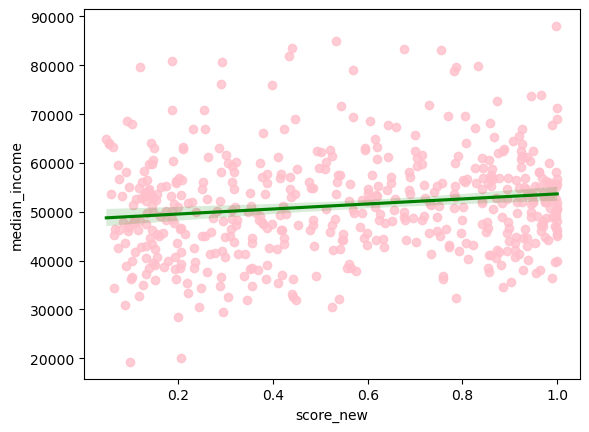

In [70]:
# use regplot
sb.regplot(x = 'score_new', y = 'median_income',data = merged_score, 
           scatter_kws={'color': 'pink'}, line_kws={'color': 'green'})

In [71]:
# making the map_overlap for new score (it includes the 2 new datasets)

score['sa2_code'] = score['sa2_code'].astype(str)
sa2_regionog['sa2_code'] = sa2_regionog['sa2_code'].astype(str)

map_new_sig_score = pd.merge(score[['sa2_code','score_new']], sa2_regionog[['sa2_code','geometry','ste_name21' ]], on='sa2_code')

In [72]:
map_new_sig_score = map_new_sig_score[(map_new_sig_score['ste_name21']=='New South Wales')]

In [73]:
map_new_sig_score.drop('sa2_code', inplace=True, axis=1)
map_new_sig_score.drop('ste_name21', inplace=True, axis=1)

In [74]:
new_score_gdf = gpd.GeoDataFrame(map_new_sig_score, geometry = 'geometry')

/var/folders/1r/ff0jrlxj2xl84y04w1jq6syc0000gn/T/ipykernel_12807/2032250127.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3')


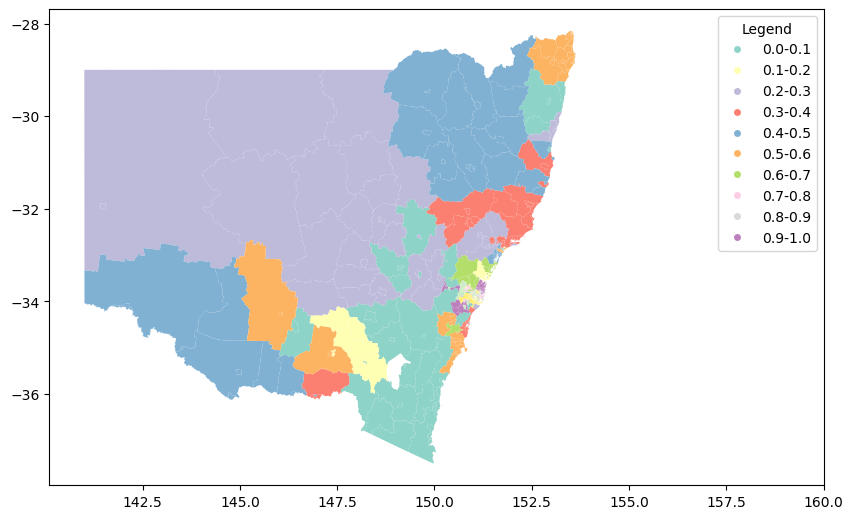

In [84]:
new_score_gdf.plot(figsize=(10,10), cmap = 'Set3', legend =True)

cmap = plt.cm.get_cmap('Set3')

# Set color limits
v_min = new_score_gdf['score_new'].min()
v_max = new_score_gdf['score_new'].max()

# Create colorbar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm.set_array([]) 

# Set for legend
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5','0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Add legend
plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', markerfacecolor=cmap(i), label=label)
                    for i, label in enumerate(labels)], title='Legend')

plt.savefig('score_new_map.png')

# Show plot
plt.show()

In [76]:
plt.close()

In [77]:
# making the map_overlap for original score

score['sa2_code'] = score['sa2_code'].astype(str)
sa2_regionog['sa2_code'] = sa2_regionog['sa2_code'].astype(str)

map_og_sig_score = pd.merge(score[['sa2_code','score_og']], sa2_regionog[['sa2_code','geometry','ste_name21']], on='sa2_code')

In [78]:
map_og_sig_score = map_og_sig_score[(map_og_sig_score['ste_name21']=='New South Wales')]

In [79]:
map_og_sig_score.drop('sa2_code', inplace=True, axis=1) 
map_og_sig_score.drop('ste_name21', inplace=True, axis=1)

In [80]:
og_score_gdf = gpd.GeoDataFrame(map_og_sig_score, geometry = 'geometry')

/var/folders/1r/ff0jrlxj2xl84y04w1jq6syc0000gn/T/ipykernel_12807/1550278337.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3')


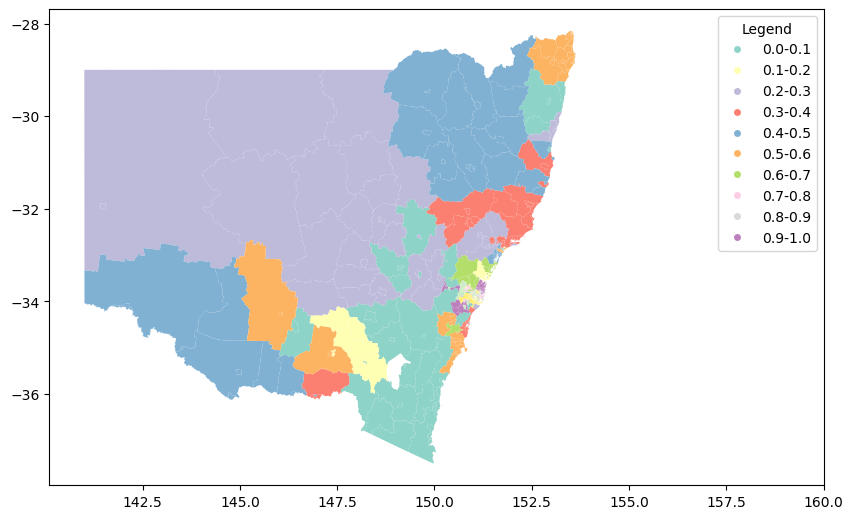

In [81]:
og_score_gdf.plot(figsize=(10,10), cmap = 'Set3', legend =True)

cmap = plt.cm.get_cmap('Set3')

# Set color limits
v_min = og_score_gdf['score_og'].min()
v_max = og_score_gdf['score_og'].max()

# Create colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm.set_array([]) 

# Set labels
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5','0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Add legend 
plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', markerfacecolor=cmap(i), label=label)
                    for i, label in enumerate(labels)], title='Legend')

plt.savefig('score_og_map.png')

plt.show()


In [82]:
plt.close()

In [83]:
conn.close()